In [107]:
import os
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from keras.layers import Dense, Dropout, Activation, Conv1D, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow import keras

import tensorflow

from keras.optimizers import adam_v2


from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

import time
LOG_DIR = "{int(time.time())}"

In [108]:
train_data = loadtxt('train_data.csv', delimiter=',')

In [109]:
X_train_data = train_data[:,1:44]
y_train_data = train_data[:,0]

In [110]:
X_train_data.shape

(386, 43)

In [111]:
test_data = loadtxt('test_data.csv', delimiter=',')

In [112]:
X_test_data = test_data[:,1:44]
y_test_data = test_data[:,0]

### Train

0.001 

In [170]:
model = Sequential()
model.add(Dense(1024, input_dim=43, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [171]:
optimizer = adam_v2.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',  optimizer=optimizer  , metrics=['accuracy'])

In [172]:
history=model.fit(X_train_data, y_train_data, validation_split=0.10, epochs=50, batch_size=32)


Epoch 1/50
11/11 [==============================] - ETA: 8s - loss: 1.8956 - accuracy: 0.56 - ETA: 0s - loss: 3.3259 - accuracy: 0.51 - 1s 33ms/step - loss: 3.1389 - accuracy: 0.5198 - val_loss: 1.1601 - val_accuracy: 0.4615
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 0.7861 - accuracy: 0.68 - ETA: 0s - loss: 0.9082 - accuracy: 0.52 - 0s 8ms/step - loss: 0.9005 - accuracy: 0.5215 - val_loss: 0.6724 - val_accuracy: 0.6154
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 0.7142 - accuracy: 0.43 - ETA: 0s - loss: 0.7076 - accuracy: 0.50 - 0s 9ms/step - loss: 0.7080 - accuracy: 0.5152 - val_loss: 0.6639 - val_accuracy: 0.6410
Epoch 4/50
11/11 [==============================] - ETA: 0s - loss: 0.6250 - accuracy: 0.68 - ETA: 0s - loss: 0.6693 - accuracy: 0.59 - 0s 8ms/step - loss: 0.6711 - accuracy: 0.5916 - val_loss: 0.6814 - val_accuracy: 0.4872
Epoch 5/50
11/11 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.56 - ETA: 0s -

Epoch 39/50
11/11 [==============================] - ETA: 0s - loss: 0.5357 - accuracy: 0.87 - 0s 7ms/step - loss: 0.5526 - accuracy: 0.7456 - val_loss: 0.6524 - val_accuracy: 0.6154
Epoch 40/50
11/11 [==============================] - ETA: 0s - loss: 0.5727 - accuracy: 0.71 - ETA: 0s - loss: 0.5549 - accuracy: 0.72 - 0s 8ms/step - loss: 0.5565 - accuracy: 0.7233 - val_loss: 0.6723 - val_accuracy: 0.6667
Epoch 41/50
11/11 [==============================] - ETA: 0s - loss: 0.4605 - accuracy: 0.78 - ETA: 0s - loss: 0.5908 - accuracy: 0.67 - 0s 9ms/step - loss: 0.5938 - accuracy: 0.6728 - val_loss: 0.6381 - val_accuracy: 0.6410
Epoch 42/50
11/11 [==============================] - ETA: 0s - loss: 0.7270 - accuracy: 0.46 - ETA: 0s - loss: 0.6466 - accuracy: 0.59 - 0s 8ms/step - loss: 0.6430 - accuracy: 0.5975 - val_loss: 0.6505 - val_accuracy: 0.6667
Epoch 43/50
11/11 [==============================] - ETA: 0s - loss: 0.4336 - accuracy: 0.84 - ETA: 0s - loss: 0.5413 - accuracy: 0.73 - 0s 7m

In [173]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

18/18 [==============================] - ETA: 0s - loss: 0.2655 - accuracy: 1.00 - 0s 2ms/step - loss: 0.6166 - accuracy: 0.6250
Accuracy: 62.50


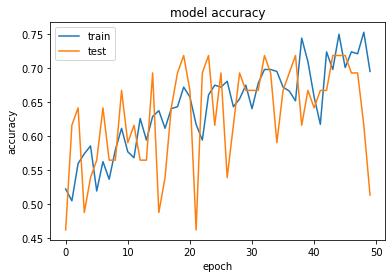

In [174]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


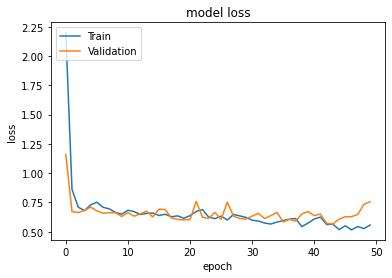

In [175]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save_weightss

### Trining 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Making predections

In [ ]:

# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(500):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))